In [12]:
import numpy as np
import pandas as pd
import os
import scipy

from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style='whitegrid')

from os.path import join as pjoin

import glob

import itertools as it

%config InteractiveShell.ast_node_interactivity='all'


# Helper Functions

In [13]:
def extract_pbr_at_time(df, extract_time, time_delta='30min', return_single=False):
    """
    This function returns a time specific portion of the PBR DataFrame consisting
    of the previous 16min (as default) of the input extract_time and the post 5min.
    If return_single=True, a resampled mean of that portion is returned as single 
    row DF
    """
    
    # ensure that the arguments are in the proper format for manipulation
    st = pd.to_datetime(extract_time)
    td = pd.to_timedelta(time_delta)

    # create mask from relevant dates
    mask = (df.index > st) & (df.index < st+td)
    
    # extracted dates DF
    ext =  df.loc[mask]
    #print(ext)
    if not return_single:
        
        return ext.dropna(how='any')
    
    else:
        # down sample the extracted dates to 5min buckets and return the row
        # that is closest in time with the requested 'extract_time' parameter
        ext = ext.resample('15min', label='right').mean().dropna(how='any')
        
        # index of 'nearest' to requested time
        idx = ext.index.get_loc(st, method='nearest')#get index date
        
        # Series needs to be transformed for posterity
        single_row = pd.DataFrame(ext.iloc[idx]).T
        
        return single_row


# Data

In [14]:
pbr_path='../data_o/pbr/pbr_exp_preprocessed'
locs = []
for root, dirs, files in os.walk(pbr_path):
    for name in files:
        if 'daily' not in name and 'matching' not in name:
            locs.append(pjoin(root, name))

locs =  [locs[2], locs[1], locs[0], locs[3]]



# Relevant Dates

In [15]:
### these are the dates we need to extract

exp2_dates = ['2019-04-17 21:00:00', '2019-04-18 17:30:00',
               '2019-04-19 12:30:00', '2019-04-20 16:45:00',
               '2019-04-21 20:00:00', '2019-04-22 14:00:00',
               '2019-04-23 15:30:00', '2019-04-24 17:30:00',
               '2019-04-25 16:30:00', '2019-04-26 17:45:00',
               '2019-04-27 18:15:00', '2019-04-28 18:45:00',
               '2019-04-29 17:45:00']

exp3_dates = ['2019-05-11 19:00:00', '2019-05-12 19:30:00',
               '2019-05-13 19:45:00', '2019-05-14 20:30:00',
               '2019-05-15 17:15:00', '2019-05-16 16:45:00',
               '2019-05-17 14:30:00', '2019-05-20 15:15:00',
               '2019-05-21 14:45:00', '2019-05-22 15:15:00',
               '2019-05-23 15:00:00', '2019-05-24 16:45:00']





# comparison 1
# Extract the above dates from the the PBR respective exp # datasets using the date extraction tool
# Apply Old & New model to PBR data and see how these compare against each other


# comparison 2
# Create a tool which extracts the datetime row from the raw CC data files
# these dates will then be used to extract absorbance readings from their
# respective pbr data, depending on how comparison1 fares we could then
# say something about what we should have expected on exp4

In [16]:
# use too glob library to extract from each day's T1, the time at which it was
# measured, this will give you a list of datetime which you can then extract from
# the pbr preprocessed data.... 

# having done the comparison above: i.e. compara how the tecan measurements compare
# against the pbr data
path0 = '../data_o/pbr/exp?/cell_counter/*d?_t1_01.#m4' # this works
path1 = '../data_o/pbr/exp?/cell_counter/*_d??_t1_01.#m4'

In [17]:
# global dataframe

date_times = {'xp1':{},
              'xp2':{},
              'xp3':{},
              'xp4':{}}

In [18]:
for path in [path0, path1]:
    for path_str in glob.iglob(path):
        #path_str

        splt = path_str.split(sep='_') 
        xpN = splt[-4]
        xpD = splt[-3]

        # load files
        f = open(path_str)
        lines = f.readlines()[31]

        # the files are standardized thus in the 32nd line
        # we selected the True values which encompass the
        # time at which these measurements were made, this
        # only works with numpy arrays, however
        try:

            selector = [False, False, False, True, False, True, True, True]
            #lines.strip('\n').split(' ')
            asarray = np.array(lines.strip('\n').split(' '))[selector]

        except:
            selector = [False, False, False, True, False, False, True, True, True]
            #lines.strip('\n').split(' ')
            asarray = np.array(lines.strip('\n').split(' '))[selector]

        # join the datetime informatio and convert to pd.datetime obj
        datetime = ' '.join([*asarray][::-1])
        datetime = pd.to_datetime(datetime)

        # append to dictionary
        date_times[xpN][xpD] = datetime
        

In [22]:
date_times

{'xp1': {'d49': Timestamp('2019-04-15 12:30:57'),
  'd42': Timestamp('2019-04-08 16:58:00'),
  'd29': Timestamp('2019-03-26 11:01:41')},
 'xp2': {'d2': Timestamp('2019-04-19 12:37:03'),
  'd5': Timestamp('2019-04-22 14:13:04'),
  'd9': Timestamp('2019-04-26 18:16:21'),
  'd7': Timestamp('2019-04-24 17:45:10'),
  'd1': Timestamp('2019-04-18 17:54:31'),
  'd6': Timestamp('2019-04-23 21:30:02'),
  'd8': Timestamp('2019-04-25 16:57:48'),
  'd3': Timestamp('2019-04-20 16:58:22'),
  'd4': Timestamp('2019-04-21 20:09:19'),
  'd0': Timestamp('2019-04-17 21:42:57'),
  'd10': Timestamp('2019-04-27 18:44:26'),
  'd11': Timestamp('2019-04-28 19:12:12'),
  'd12': Timestamp('2019-04-29 18:23:05')},
 'xp3': {'d5': Timestamp('2019-05-16 17:07:26'),
  'd4': Timestamp('2019-05-15 17:48:28'),
  'd8': Timestamp('2019-05-20 15:45:43'),
  'd7': Timestamp('2019-05-17 14:38:21'),
  'd3': Timestamp('2019-05-14 20:44:34'),
  'd0': Timestamp('2019-05-11 19:12:01'),
  'd9': Timestamp('2019-05-21 15:12:13'),
  'd1

In [23]:
# The dates also exist in the all cellcounts datasheet, compare

#date_times

# cell counts are made roughly 1/2 hour after the tecan measurements
# which was the usual case when actually collecting the data



In [24]:
# Once you have done this ask pepe for other tecan-measured data if he has it for exp4

# load TecMeasd Modeled Data

In [25]:
# for these exact experiemts x2 x3
# pull the PBR abs measurements for these experiments dates
# apply the model and compare them against each other,
# how closely do they align... is it regressable, if regressable, there is a high degree
# of correlation OR they match exactly  along the 1:1 LINE, this would mean the models
# are 'perfect'
# 
path = '../data_o/pbr/pbr_modeled_output_data'

tcx2= pd.read_csv(pjoin(path,'tec_measd_exp2_modeled_output.csv'),index_col=0)
tcx3= pd.read_csv(pjoin(path,'tec_measd_exp3_modeled_output.csv'),index_col=0)


tcx2.head()



# load PBR data
#pbr1 = pd.read_csv(locs[0],index_col=0,parse_dates=['date_time'])
pbr2 = pd.read_csv(locs[1],index_col=0,parse_dates=['time'])
pbr3 = pd.read_csv(locs[2],index_col=0,parse_dates=['time'])
#pbr4 = pd.read_csv(locs[3],index_col=0,parse_dates=['date_time'])





# extract dates from pbr_cell counts data because its more complete than what you extracted
# above for exp4, (above extracted dates should match).... you need to extract these dates
# so that you can:
    # 1. check the measurements given by PEPE with the averages extracted by your function
            # they should be very close
    # 2. apply the a680_a720 model to those dates rows
    # 3. IF the first analysis of tecmesd data values
    # match along the 1:1 style.background_gradientline then its likely that these 
    # measurements in the tubes are fairly truthful (depending on the ratio analysis)
    # if there is a HIGH Degree of Correlation (which is what I'm thinking) then
    # do a regression and obtain kT, this kT is another coversion factor to the PBR
    # data, if this is the case can we ignore the other constants
    
path = '../data_o/pbr'
fname = 'all_pbr_cell_counter_results.csv'


# apply model extracted dates data to pbr
# compare

# apply the new models to the old calibration data

,tBv1,tCv1,tBv2,tCv2,tBv3,tCv3,tBv4,tCv4,tBv5,tCv5,tBv6,tCv6,tBv7,tCv7,tBv8,tCv8
date_time,,,,,,,,,,,,,,,,
2019-04-17 20:55:00,0.000836,0.022213,-0.001026,0.024319,0.001900,0.017826,0.005855,0.016180,0.004028,0.016438,0.006126,0.016652,0.004638,0.021193,-0.005713,0.027620
2019-04-18 17:25:00,0.093958,0.017285,0.111519,0.014753,0.100815,0.025022,0.103945,0.015191,0.109838,0.029399,0.000792,0.017170,0.002260,0.020999,-0.002806,0.029497
2019-04-19 12:25:00,0.033724,0.024084,0.041284,0.024386,0.093359,0.033943,0.075040,0.024839,0.092674,0.033132,-0.012924,0.053013,-0.005327,0.044082,-0.017054,0.071163
2019-04-20 16:40:00,0.036231,0.010238,0.030562,0.013612,0.071383,0.010958,0.047569,0.010752,0.066213,0.010233,-0.002688,0.037979,0.001369,0.023650,-0.017500,0.043261
2019-04-21 19:55:00,0.038799,0.007833,0.028137,0.015883,0.092639,-0.008953,-0.011920,0.066475,0.069209,0.007427,0.016285,0.020207,0.011783,0.013895,0.012601,0.015065


In [26]:
# build a table using the first timestamp
pbxdf2 = extract_pbr_at_time(pbr2, extract_time=exp2_dates[0], time_delta='20min', return_single=True)
for d in exp2_dates[1:]:
    # append new extractions
    pbxdf2 = pd.concat([pbxdf2, extract_pbr_at_time(pbr2, extract_time=d, time_delta='5min', return_single=True)])
#pbxdf2.columns = ['T'+i[-1]+i[1:4] for i in pbxdf2.columns.values]

In [27]:
pbxdf3 = extract_pbr_at_time(pbr3, extract_time=exp3_dates[0], time_delta='5min', return_single=True)
for d in exp3_dates[1:]:
    #d
    #pbr2.head()
    pbxdf3 = pd.concat([pbxdf3, extract_pbr_at_time(pbr3, extract_time=d, time_delta='5min', return_single=True)])
#pbxdf3.columns = ['T'+i[-1]+i[1:4] for i in pbxdf3.columns.values]

In [28]:
#### TO THIS DATA apply the models models and compare the values to the actual
#### tecan measured valeus

In [29]:
rename = ['T'+i[-1]+i[1:4] for i in pbxdf2.columns.values]

rename

['T1680',
 'T1720',
 'T2680',
 'T2720',
 'T3680',
 'T3720',
 'T4680',
 'T4720',
 'T5680',
 'T5720',
 'T6680',
 'T6720',
 'T7680',
 'T7720',
 'T8680',
 'T8720']

In [ ]:
# tecan already has predicted values save only the 
tcx2 = tcx2[[i for i in tcx2.columns.values if 'p680_720_560' in i]]
tcx2
path ='../data_o/pbr/pbr_exp_preprocessed'


# pbxdf2.to_csv(pjoin(path,'pbr_matching_dates_to_tecan_x2_5mins.csv'))

In [30]:
tcx3 = tcx3[[i for i in tcx2.columns.values if 'p680_720_560' in i]]

In [31]:
# pbxdf3.to_csv(pjoin(path,'pbr_matching_dates_to_tecan_x3_5mins.csv'))

In [32]:
# Visualize Data

In [33]:
tcx2.columns = [i[0:3] for i in tcx2.columns.values]
tcx3.columns = [i[0:3] for i in tcx3.columns.values]

In [34]:
# load
path = '../data_o/pbr/pbr_modeled_output_data'
pbx2 = pd.read_csv(pjoin(path,'pbr_w_tec_dates_x2.csv'), index_col=0)
pbx3 = pd.read_csv(pjoin(path,'pbr_w_tec_dates_x3.csv'), index_col=0)

In [35]:
pbx2 = pbx2[[i for i in pbx2.columns.values if '_' not in i]]
pbx3 = pbx3[[i for i in pbx3.columns.values if '_' not in i]]

In [36]:
c1 = tcx2.columns
c2 = pbx2.columns

In [37]:
c1
c2
g = zip(c1, c2)


Index(['tBv', 'tCv', 'tBv', 'tCv', 'tBv', 'tCv', 'tBv', 'tCv', 'tBv', 'tCv',
       'tBv', 'tCv', 'tBv', 'tCv', 'tBv', 'tCv'],
      dtype='object')

Index(['Bv1', 'Cv1', 'Bv2', 'Cv2', 'Bv3', 'Cv3', 'Bv4', 'Cv4', 'Bv5', 'Cv5',
       'Bv6', 'Cv6', 'Bv7', 'Cv7', 'Bv8', 'Cv8'],
      dtype='object')

('tBv', 'Bv1')

ValueError: x and y must be the same size

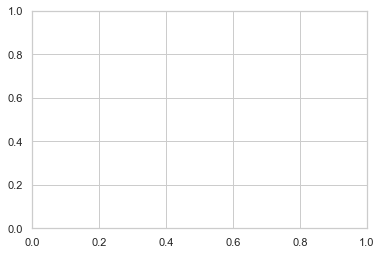

In [38]:

g = zip(c1, c2)

for i, j in g:
    i,j
    b1 = tcx2[i].values.reshape(-1,1)
    b2 = pbx2[j].values.reshape(-1,1)
    
    plt.scatter(b1, b2)
    
    #plt.show()

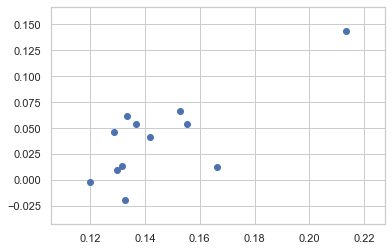

In [301]:
b1 = tcx2['T1B'].values.reshape(-1,1)
b2 = pbx2['Bv1'].values.reshape(-1,1)
plt.scatter(b1, b2)

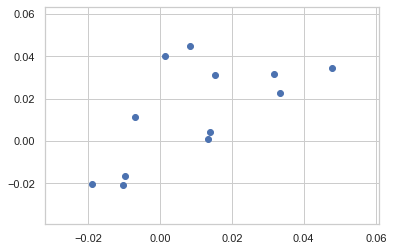

In [297]:
plt.scatter(c1, c2)